# Overview of the approach:

1.  Comprehensive Literature Retrieval : Initially, we gathered articles from the Web of Science portal that mentioned "Generative AI". We extracted keywords from each article, where keywords are separated by a semicolon (";"). We then standardized these keywords—meaning we consolidated different variations of the same keyword (e.g., "Gen AI," "Generative AI," and "Generative Artificial Intelligence" were all grouped under a single representative term). We used a pre-trained model from the Transformer library to help with this grouping, ensuring that each keyword was uniquely and consistently represented.
2.   Keyword Co-Occurrence Network Analysis : Next, we created a matrix to see how often pairs of keywords appeared in the same articles. Each row and column in this matrix represents a different keyword. We counted how many times each pair of keywords was cited together across all articles and filled the matrix with these counts. This setup helped us visualize which keywords tend to co-occur more frequently, indicating related research areas.
3. Identification of Key Research Themes : Using the co-occurrence matrix, we identified key research themes by focusing on the keywords most frequently associated with "Generative AI." We selected the top five keywords that appeared most often with "Generative AI" in our articles. We then visualized these relationships using a network graph, where nodes represent keywords and edges represent their co-occurrence frequency (the number of articles they appear in together). This graph helped us pinpoint which topics are currently receiving the most attention in the field of Generative AI.  

##Comprehensive Literature Retrieval

In [1]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Set working directory
%cd /content/drive/MyDrive/FDA/

/content/drive/MyDrive/FDA


Install the transformers to identify the similarity measures between the keywords and group it into a single word.

In [3]:
!pip install transformers sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 2.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

Import all libraries.

In [4]:
# Include Libraries
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.dates import DateFormatter

The records from Web Of Science database is exported in excel. In this step, we are importing the datasets from excel to dataframes. The datasets are exported in two parts - savedrecs_1-1000.xls and savedrecs_1001_1148.xls. Hence, two dataframes are created.

In [5]:
#Create dataframes from the Web of Service portal
df_arclist1 = pd.read_excel('savedrecs_1-1000.xls')
df_arclist2 = pd.read_excel('savedrecs_1001_1148.xls')

View first list of articles from Web of Service.

In [6]:
df_arclist1

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Sachan, S; Liu, X",NaN,NaN,NaN,"Sachan, Swati; Liu (Lisa), Xi",NaN,NaN,Blockchain-based auditing of legal decisions s...,ENGINEERING APPLICATIONS OF ARTIFICIAL INTELLI...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001136038900001,0
1,J,"Ferrari, F; van Dijck, J; van den Bosch, A",NaN,NaN,NaN,"Ferrari, Fabian; van Dijck, Jose; van den Bosc...",NaN,NaN,"Observe, inspect, modify: Three conditions for...",NEW MEDIA & SOCIETY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001111091300001,0
2,J,"Agrawal, K",NaN,NaN,NaN,"Agrawal, Kalyan Prasad",NaN,NaN,Towards Adoption of Generative AI in Organizat...,JOURNAL OF COMPUTER INFORMATION SYSTEMS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001039548700001,0
3,J,"Karapantelakis, A; Alizadeh, P; Alabassi, A; D...",NaN,NaN,NaN,"Karapantelakis, Athanasios; Alizadeh, Pegah; A...",NaN,NaN,Generative AI in mobile networks: a survey,ANNALS OF TELECOMMUNICATIONS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001051048200001,0
4,J,"Saetra, HS",NaN,NaN,NaN,"Saetra, Henrik Skaug",NaN,NaN,"Generative AI: Here to stay, but for good?",TECHNOLOGY IN SOCIETY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001078500600001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,J,"Kim, D; Song, K; Kim, YY; Shin, Y; Kang, W; Mo...",NaN,NaN,NaN,"Kim, Dongjun; Song, Kyungwoo; Kim, Yoon-Yeong;...",NaN,NaN,Sequential Likelihood-Free Inference with Neur...,PATTERN RECOGNITION LETTERS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001031613300001,0
996,J,"Li, KD; Zhang, J; Forsyth, D",NaN,NaN,NaN,"Li, Kedan; Zhang, Jeffrey; Forsyth, David",NaN,NaN,POVNet: Image-Based Virtual Try-On Through Acc...,IEEE TRANSACTIONS ON PATTERN ANALYSIS AND MACH...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001068816800045,0
997,J,"Pedersen, EM; Agerbo, E; Plana-Ripoll, O; Stei...",NaN,NaN,NaN,"Pedersen, Emil M.; Agerbo, Esben; Plana-Ripoll...",NaN,NaN,ADuLT: An efficient and robust time-to-event GWAS,NATURE COMMUNICATIONS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001066679400017,0
998,J,"Rao, A; Pang, M; Kim, J; Kamineni, M; Lie, W; ...",NaN,NaN,NaN,"Rao, Arya; Pang, Michael; Kim, John; Kamineni,...",NaN,NaN,Assessing the Utility of ChatGPT Throughout th...,JOURNAL OF MEDICAL INTERNET RESEARCH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001160247000005,0


View second list of articles from Web of Service portal.

In [7]:
df_arclist2

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Sahu, HP; Kashyap, R",NaN,NaN,NaN,"Sahu, Hemlata P.; Kashyap, Ramgopal",NaN,NaN,Fine_Denseiganet: Automatic Medical Image Clas...,INTERNATIONAL JOURNAL OF IMAGE AND GRAPHICS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001034776000001,0
1,J,"Isomura, T; Kotani, K; Jimbo, Y; Friston, KJ",NaN,NaN,NaN,"Isomura, Takuya; Kotani, Kiyoshi; Jimbo, Yasuh...",NaN,NaN,Experimental validation of the free-energy pri...,NATURE COMMUNICATIONS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001045127700014,0
2,J,"Tang, H; Sun, GL; Sebe, N; Van Gool, L",NaN,NaN,NaN,"Tang, Hao; Sun, Guolei; Sebe, Nicu; Van Gool, Luc",NaN,NaN,Edge Guided GANs With Multi-Scale Contrastive ...,IEEE TRANSACTIONS ON PATTERN ANALYSIS AND MACH...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001104973300024,0
3,J,"Duarte, MM; Azevedo, L",NaN,NaN,NaN,"Duarte, Miguel M. M.; Azevedo, Leonardo",NaN,NaN,Automatic Detection and Identification of Floa...,IEEE TRANSACTIONS ON GEOSCIENCE AND REMOTE SEN...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001018689000003,0
4,J,"Lew, AJ; Buehler, MJ",NaN,NaN,NaN,"Lew, Andrew J.; Buehler, Markus J.",NaN,NaN,Single-shot forward and inverse hierarchical a...,MATERIALS TODAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001001955300001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,J,"Watanabe, K; Okusa, S; Sato, M; Miura, H; Mori...",NaN,NaN,NaN,"Watanabe, Kazuhiro; Okusa, Shoichi; Sato, Mits...",NaN,NaN,mHealth Intervention to Promote Physical Activ...,JMIR FORMATIVE RESEARCH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001115617200004,0
144,J,"Lindebaum, D; Moser, C; Islam, G",NaN,NaN,NaN,"Lindebaum, Dirk; Moser, Christine; Islam, Gazi",NaN,NaN,"Big Data, Proxies, Algorithmic Decision-Making...",JOURNAL OF MANAGEMENT STUDIES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001128400700001,0
145,J,"Mirikharaji, Z; Abhishek, K; Bissoto, A; Barat...",NaN,NaN,NaN,"Mirikharaji, Zahra; Abhishek, Kumar; Bissoto, ...",NaN,NaN,A survey on deep learning for skin lesion segm...,MEDICAL IMAGE ANALYSIS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001026047500001,0
146,S,"Manning, D; Huang, TY; Berida, T; Roy, S",NaN,"Ducho, C",NaN,"Manning, Destinee; Huang, Tzu-Yu; Berida, Toma...",NaN,NaN,The challenges and opportunities of developing...,NEW APPROACHES TOWARDS NOVEL ANTIBACTERIAL AGENTS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001102573400002,0


A single list of articles is created from the two dataframes created above.

In [8]:
#merge article lists
df_arclist = pd.concat([df_arclist1,df_arclist2], ignore_index=True)
df_arclist

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Sachan, S; Liu, X",NaN,NaN,NaN,"Sachan, Swati; Liu (Lisa), Xi",NaN,NaN,Blockchain-based auditing of legal decisions s...,ENGINEERING APPLICATIONS OF ARTIFICIAL INTELLI...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001136038900001,0
1,J,"Ferrari, F; van Dijck, J; van den Bosch, A",NaN,NaN,NaN,"Ferrari, Fabian; van Dijck, Jose; van den Bosc...",NaN,NaN,"Observe, inspect, modify: Three conditions for...",NEW MEDIA & SOCIETY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001111091300001,0
2,J,"Agrawal, K",NaN,NaN,NaN,"Agrawal, Kalyan Prasad",NaN,NaN,Towards Adoption of Generative AI in Organizat...,JOURNAL OF COMPUTER INFORMATION SYSTEMS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001039548700001,0
3,J,"Karapantelakis, A; Alizadeh, P; Alabassi, A; D...",NaN,NaN,NaN,"Karapantelakis, Athanasios; Alizadeh, Pegah; A...",NaN,NaN,Generative AI in mobile networks: a survey,ANNALS OF TELECOMMUNICATIONS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001051048200001,0
4,J,"Saetra, HS",NaN,NaN,NaN,"Saetra, Henrik Skaug",NaN,NaN,"Generative AI: Here to stay, but for good?",TECHNOLOGY IN SOCIETY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001078500600001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,J,"Watanabe, K; Okusa, S; Sato, M; Miura, H; Mori...",NaN,NaN,NaN,"Watanabe, Kazuhiro; Okusa, Shoichi; Sato, Mits...",NaN,NaN,mHealth Intervention to Promote Physical Activ...,JMIR FORMATIVE RESEARCH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001115617200004,0
1144,J,"Lindebaum, D; Moser, C; Islam, G",NaN,NaN,NaN,"Lindebaum, Dirk; Moser, Christine; Islam, Gazi",NaN,NaN,"Big Data, Proxies, Algorithmic Decision-Making...",JOURNAL OF MANAGEMENT STUDIES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001128400700001,0
1145,J,"Mirikharaji, Z; Abhishek, K; Bissoto, A; Barat...",NaN,NaN,NaN,"Mirikharaji, Zahra; Abhishek, Kumar; Bissoto, ...",NaN,NaN,A survey on deep learning for skin lesion segm...,MEDICAL IMAGE ANALYSIS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001026047500001,0
1146,S,"Manning, D; Huang, TY; Berida, T; Roy, S",NaN,"Ducho, C",NaN,"Manning, Destinee; Huang, Tzu-Yu; Berida, Toma...",NaN,NaN,The challenges and opportunities of developing...,NEW APPROACHES TOWARDS NOVEL ANTIBACTERIAL AGENTS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-11,WOS:001102573400002,0


View the column names of the merged dataframe.

In [9]:
df_arclist.columns

Index(['Publication Type', 'Authors', 'Book Authors', 'Book Editors',
       'Book Group Authors', 'Author Full Names', 'Book Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'Affiliations', 'Reprint Addresses', 'Email Addresses',
       'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited References', 'Cited Reference Count',
       'Times Cited, WoS Core', 'Times Cited, All Databases',
       '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher',
       'Publisher City', 'Publisher Address', 'ISSN', 'eISSN', 'ISBN',
       'Journal Abbreviation', 'Journal ISO Abbreviation', 'Publication Date',
       'Publication Year', 'Volume', 'Issue', 'Pa

Select only relevant columns (Article Number and Author Keywords) from the dataframe for further analysis in the subsequent steps.

In [10]:
#Get relevant columns from the dataframe
df_arcl_kywrd = pd.DataFrame ({'Article Number':df_arclist['Article Number'], 'Keywords':df_arclist['Author Keywords']})
df_arcl_kywrd

,Article Number,Keywords
0,107666,Legal; Law; Explainable AI; Blockchain; Genera...
1,NaN,AI governance; AI regulation; generative AI; g...
2,NaN,Generative AI; innovation diffusion; TOE frame...
3,NaN,Generative AI; Telecom; 6 G; 5 G; Survey; Appl...
4,102372,Generative AI; Large language models; Generati...
...,...,...
1143,e51334,eHealth; behavioral change; mobile phone; smar...
1144,NaN,algorithms; big data; corporate empiricism; pe...
1145,102863,Skin lesion; Deep learning; Segmentation; Survey
1146,NaN,NaN


Remove records without article number, as article number is the primary key for keyword analysis.

In [11]:
#Remove records without article number
df_arcl_kywrd = df_arcl_kywrd.dropna(subset=['Article Number'])
df_arcl_kywrd

,Article Number,Keywords
0,107666,Legal; Law; Explainable AI; Blockchain; Genera...
4,102372,Generative AI; Large language models; Generati...
10,111315,Generative AI; Interdependencies; Interaction;...
12,55,Generative AI; AI regulation; AI ethics; AI so...
13,101070,Multimodal generative AI; Affordances of multi...
...,...,...
1138,e52036,digital therapeutics; mHealth; diabetes mellit...
1140,e43202,combined nutrition; parenteral nutrition; vlbw...
1141,e47101,diet; nutrition; information; internet; web; J...
1143,e51334,eHealth; behavioral change; mobile phone; smar...


Remove the records without any keywords in the 'Keywords' column.

In [12]:
#Remove records without Keywords
df_arcl_kywrd = df_arcl_kywrd.dropna(subset=['Keywords'])
df_arcl_kywrd

,Article Number,Keywords
0,107666,Legal; Law; Explainable AI; Blockchain; Genera...
4,102372,Generative AI; Large language models; Generati...
10,111315,Generative AI; Interdependencies; Interaction;...
12,55,Generative AI; AI regulation; AI ethics; AI so...
13,101070,Multimodal generative AI; Affordances of multi...
...,...,...
1138,e52036,digital therapeutics; mHealth; diabetes mellit...
1140,e43202,combined nutrition; parenteral nutrition; vlbw...
1141,e47101,diet; nutrition; information; internet; web; J...
1143,e51334,eHealth; behavioral change; mobile phone; smar...


Convert all the keyword in uppercase to identify similarity between them. After conversion the data is stored in a new dataframe called 'df_arcl_kywrd'.

In [13]:
#Convert all records in uppercase
# Iterating over each row and updating 'Keywords' in a loop
for index, row in df_arcl_kywrd.iterrows():
    # Convert 'Keywords' to uppercase and update the DataFrame
    df_arcl_kywrd.at[index, 'Keywords'] = row['Keywords'].upper()

#Show the dataframe
df_arcl_kywrd= df_arcl_kywrd.sort_values(by='Keywords', ascending=True)
df_arcl_kywrd

,Article Number,Keywords
254,92,3D SHAPE GENERATION; 3D SHAPE REPRESENTATION; ...
43,100790,ACADEMIC INTEGRITY; BARD; CHATGPT; CRITICAL AN...
87,856,ACADEMIC INTEGRITY; CHATBOTS; GENERATIVE ARTIF...
944,20220077,ACTIVE INFERENCE; REPRESENTATION LEARNING; SYM...
142,492,ACTIVE LEARNING; ONLINE LEARNING; STUDENTS' EN...
...,...,...
1076,1760,URBAN PLUVIAL FLOODING; DEEP LEARNING; SPATIOT...
206,100223,URBAN SOLAR POTENTIAL; DATA-DRIVEN; DEEP GENER...
958,e42668,URODYNAMIC STUDIES; SUPPORT VECTOR MACHINE; RA...
663,103568,WATER DISTRIBUTION SYSTEMS; AI ASSURANCE; ANOM...


Remove duplicate records by article number and keywords.

In [14]:
#Remove duplicates by Article Number and Keywords
df_arcl_kywrd = df_arcl_kywrd.drop_duplicates(subset=['Article Number', 'Keywords'])
df_arcl_kywrd

,Article Number,Keywords
254,92,3D SHAPE GENERATION; 3D SHAPE REPRESENTATION; ...
43,100790,ACADEMIC INTEGRITY; BARD; CHATGPT; CRITICAL AN...
87,856,ACADEMIC INTEGRITY; CHATBOTS; GENERATIVE ARTIF...
944,20220077,ACTIVE INFERENCE; REPRESENTATION LEARNING; SYM...
142,492,ACTIVE LEARNING; ONLINE LEARNING; STUDENTS' EN...
...,...,...
1076,1760,URBAN PLUVIAL FLOODING; DEEP LEARNING; SPATIOT...
206,100223,URBAN SOLAR POTENTIAL; DATA-DRIVEN; DEEP GENER...
958,e42668,URODYNAMIC STUDIES; SUPPORT VECTOR MACHINE; RA...
663,103568,WATER DISTRIBUTION SYSTEMS; AI ASSURANCE; ANOM...


Count the number of records(Keyword set) for each article number.

In [15]:
#Count records by article number
record_counts = df_arcl_kywrd.groupby('Article Number')['Article Number'].count().reset_index(name='record_count')
print(record_counts)

    Article Number  record_count
0                1             1
1                2             6
2                3             1
3                8             2
4               10             1
..             ...           ...
441           e858             1
442     m231102a10             1
443        ooad079             1
444        pgae004             1
445        zmad045             1

[446 rows x 2 columns]


View a sample article number with multiple keyword set. A new dataframe 'df_article_no' is created to view this sample article number.

In [16]:
df_article_no= df_arcl_kywrd[df_arcl_kywrd['Article Number']== 2]
df_article_no

,Article Number,Keywords
786,2,ARTIFICIAL INTELLIGENCE; CO-WRITING; ETHICS; L...
303,2,CHATGPT; ARTIFICIAL INTELLIGENCE; LARGE LANGUA...
431,2,CHATGPT; OPENAI; ARTIFICIAL INTELLIGENCE; LARG...
827,2,DEEP NEURAL NETWORKS; ELASTIC NETWORKS; BARBAD...
107,2,GENERATIVE AI; STUDENT-MACHINE INTERACTION; SE...
605,2,URBAN PLANNING; REPRESENTATION LEARNING; GENER...


Each keyword from the keyword set is extracted splitting each one of them from keyword set. Each keyword is separated by '; '. A new dataframe called 'df_arcl_kywrd_extended' is created after exploding each of the keyword set.

In [17]:
# Create an empty DataFrame to hold the exploded data
df_arcl_kywrd_extended = pd.DataFrame()

for index, row in df_arcl_kywrd.iterrows():
    # Split keywords into a list
    keywords_list = row['Keywords'].split('; ')

    # Create a new DataFrame for each row's keywords
    df_temp = pd.DataFrame({
        'Article Number': [row['Article Number']] * len(keywords_list),
        'Keywords': keywords_list
    })

    # Append to the main exploded DataFrame
    df_arcl_kywrd_extended = pd.concat([df_arcl_kywrd_extended, df_temp], ignore_index=True)

View the exploded dataframe. In this dataframe, there is one row for each keyword/article number combination.

In [18]:
df_arcl_kywrd_extended

,Article Number,Keywords
0,92,3D SHAPE GENERATION
1,92,3D SHAPE REPRESENTATION
2,92,DIFFUSION MODELS
3,92,SHAPE RECONSTRUCTION
4,92,GENERATIVE MODELS
...,...,...
2901,113522,DEEP LEARNING
2902,113522,IMAGE TRANSLATION
2903,113522,GENERATIVE ADVERSARIAL NETWORKS (GAN)
2904,113522,SENTINEL-1


Counting the number of keywords per article number. There are total 446 unique articles.

In [19]:
#Count records by article number
cleaned_record_counts = df_arcl_kywrd_extended.groupby('Article Number')['Article Number'].count().reset_index(name='record_count')
print(cleaned_record_counts)

    Article Number  record_count
0                1             6
1                2            30
2                3             5
3                8            10
4               10             6
..             ...           ...
441           e858             5
442     m231102a10             5
443        ooad079             5
444        pgae004             4
445        zmad045             5

[446 rows x 2 columns]


df_article_sample
View one article which has multiple keywords. The sample article is stored in a new dataframe - .

In [20]:
#View one sample article
df_article_sample= df_arcl_kywrd_extended[df_arcl_kywrd_extended['Article Number'] == 107666]
df_article_sample

,Article Number,Keywords
2162,107666,LEGAL
2163,107666,LAW
2164,107666,EXPLAINABLE AI
2165,107666,BLOCKCHAIN
2166,107666,GENERATIVE AI
2167,107666,RESPONSIBLE AI


View the dataframe in ascending order of the keywords.

In [21]:
df_arcl_kywrd_extended= df_arcl_kywrd_extended.sort_values(by='Keywords', ascending=True)
df_arcl_kywrd_extended

,Article Number,Keywords
2771,155,0
1589,108162,0
2207,118104,01.50.HV
2425,184,2D ULTRASOUND IMAGE
0,92,3D SHAPE GENERATION
...,...,...
202,1249247,YEAST SURFACE DISPLAY (YSD)
2079,197,YOUTUBE CONTENT CREATION
2159,1279794,ZERO-SHOT CLASSIFICATION
425,60812,ZERO-TRUST


In the next steps, we need to group similar keywords in a single keyword. For example- 'Gen AI'/'Generative AI' should be grouped as a single keyword as it means the same thing. To do this, I am using a pre trained model to identify the similar keywords.

Load Pre trained models.

In [22]:
#Load Pre-trained model
from sentence_transformers import SentenceTransformer

# Load a pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In this step, we are embedding the keywords and encoding them to compute the cosine similarity in the next steps.

In [23]:
# Get unique keywords
unique_keywords = df_arcl_kywrd_extended['Keywords'].unique()

# Generate embeddings for these keywords
embeddings = model.encode(unique_keywords)

In [24]:
embeddings

array([[ 3.9207824e-02,  5.8651216e-02, -9.7629614e-02, ...,
         1.6711686e-02, -4.3618479e-03, -1.5344435e-02],
       [ 3.5122134e-02,  7.6305345e-02, -1.7297069e-02, ...,
         1.1102426e-02, -7.6922528e-02, -1.9916084e-02],
       [ 3.3783194e-02,  7.9233716e-05, -4.3356982e-03, ...,
         1.3450736e-02,  3.9442725e-02, -2.8419675e-02],
       ...,
       [ 6.0400399e-03,  1.2755407e-02,  3.3717477e-03, ...,
         2.6701037e-02, -2.6472678e-02,  3.0589538e-02],
       [-5.0948564e-02,  2.0028932e-02, -5.1137231e-02, ...,
        -4.1651580e-02,  3.1983219e-02,  4.4166828e-03],
       [-5.4579873e-02, -6.1448775e-02,  5.4895576e-02, ...,
         6.2331807e-02, -2.3767410e-02, -4.4943228e-02]], dtype=float32)

Creating a dictionary called 'similar_groups' which will have a keyword as a leader and all its related keywords in an array. Have used 0.55 as threshold to merge the related keywords.

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(embeddings)

# Define a similarity threshold (Taken 0.55 as threshold to identify similarity)
threshold = 0.55

# Find groups of similar keywords
similar_groups = {}
for idx, row in enumerate(similarity_matrix):
    similar_keywords = np.where(row >= threshold)[0]
    similar_groups[unique_keywords[idx]] = unique_keywords[similar_keywords]

# Output the groups
print(similar_groups)

{'0': array(['0'], dtype=object), '01.50.HV': array(['01.50.HV'], dtype=object), '2D ULTRASOUND IMAGE': array(['2D ULTRASOUND IMAGE', 'LIVER ULTRASOUND', 'ULTRASOUND',
       'ULTRASOUND IMAGING'], dtype=object), '3D SHAPE GENERATION': array(['3D SHAPE GENERATION', '3D SHAPE REPRESENTATION',
       'IMAGE GENERATION', 'SHAPE RECONSTRUCTION'], dtype=object), '3D SHAPE REPRESENTATION': array(['3D SHAPE GENERATION', '3D SHAPE REPRESENTATION',
       'SHAPE RECONSTRUCTION'], dtype=object), '5': array(['5'], dtype=object), '81.05.ZX': array(['81.05.ZX', '81.16.BE'], dtype=object), '81.16.BE': array(['81.05.ZX', '81.16.BE'], dtype=object), 'ABIOTIC STRESS': array(['ABIOTIC STRESS'], dtype=object), 'ABNORMAL ELECTROCARDIOGRAM': array(['ABNORMAL ELECTROCARDIOGRAM', 'ELECTROCARDIOGRAM',
       'ELECTROCARDIOGRAPHY'], dtype=object), 'ABSTRACT': array(['ABSTRACT', 'ABSTRACTIVE SUMMARIZATION', 'ABSTRACTS'], dtype=object), 'ABSTRACTIVE SUMMARIZATION': array(['ABSTRACT', 'ABSTRACTIVE SUMMARIZATION',

A new column called 'Grouped Keywords' is added in the dataframe which is the leader in the keyword set. Now, each record in the dataframe has a row with article number, all keywords in rows along with the leader keyword. This leader keyword is stored in the 'Grouped Keywords' column.

In [26]:
# Flatten the group mapping to point each term to its leader
keyword_to_leader = {}
for leader, members in similar_groups.items():
    for member in members:
        keyword_to_leader[member] = leader

# Map each keyword in DataFrame to its group leader
df_arcl_kywrd_extended['Grouped Keywords'] = df_arcl_kywrd_extended['Keywords'].apply(lambda x: keyword_to_leader.get(x, x))

print(df_arcl_kywrd_extended)

     Article Number                                      Keywords  \
2771            155                                             0   
1589         108162                                             0   
2207         118104                                      01.50.HV   
2425            184                           2D ULTRASOUND IMAGE   
0                92                           3D SHAPE GENERATION   
...             ...                                           ...   
202         1249247                   YEAST SURFACE DISPLAY (YSD)   
2079            197                      YOUTUBE CONTENT CREATION   
2159        1279794                      ZERO-SHOT CLASSIFICATION   
425           60812                                    ZERO-TRUST   
59           e41535  ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI   

                                  Grouped Keywords  
2771                                             0  
1589                                             0  
2207        

Count the number of leader/grouped keywords by article number. These grouped keywords will be treated as keywords for further analysis in the subsequent steps.

In [27]:
#Count records by article number
grouped_record_counts = df_arcl_kywrd_extended.groupby('Grouped Keywords')['Grouped Keywords'].count().reset_index(name='record_count')
print(grouped_record_counts)

                                 Grouped Keywords  record_count
0                                               0             2
1                                        01.50.HV             1
2                                               5             2
3                                        81.16.BE             2
4                                  ABIOTIC STRESS             1
..                                            ...           ...
961                   YEAST SURFACE DISPLAY (YSD)             1
962                      YOUTUBE CONTENT CREATION             1
963                      ZERO-SHOT CLASSIFICATION             5
964                                    ZERO-TRUST             6
965  ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI           288

[966 rows x 2 columns]


Test for article number with keyword as 'AI' and view its leader keyword/grouped keyword.

In [28]:
#Keyword - AI
df_keyword_sample= df_arcl_kywrd_extended[df_arcl_kywrd_extended['Keywords'] == 'AI']
df_keyword_sample

,Article Number,Keywords,Grouped Keywords
152,892,AI,"ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI"
1873,e50865,AI,"ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI"
132,105892,AI,"ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI"
963,e49877,AI,"ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI"
2625,113385,AI,"ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI"
2609,22020402,AI,"ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI"
115,e13508,AI,"ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI"
126,6524,AI,"ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI"
147,8,AI,"ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI"
953,1199350,AI,"ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI"


View all the articles where Grouped Keyword is 'ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI'. This will show all the keywords under keyword column.

In [29]:
#Group keyword - MULTIMODAL GENERATIVE AI
df_group_keyword_sample= df_arcl_kywrd_extended[df_arcl_kywrd_extended['Grouped Keywords'] == 'ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI']
df_group_keyword_sample

,Article Number,Keywords,Grouped Keywords
2342,101070,AFFORDANCES OF MULTIMODAL GENERATIVE AI,"ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI"
152,892,AI,"ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI"
1873,e50865,AI,"ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI"
132,105892,AI,"ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI"
963,e49877,AI,"ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI"
...,...,...,...
378,105871,LARGE GENERATIVE AI MODELS,"ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI"
2341,101070,MULTIMODAL GENERATIVE AI,"ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI"
2731,1184892,SYNTHETIC ARTIFICIAL INTELLIGENCE,"ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI"
623,1510002,VISUAL GENERATIVE MODELING,"ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI"


## Keyword Co-occurence Network Analysis

In the next steps, we will create the Keyword Co-occurence Network, where we will create a matrix where the keywords will be shown in rows and columns. And each cell will have the value as the number of articles.

First, we creating a new dataframe where it will have only the article number and leader/grouped keyword.

In [30]:
#Create dataframe with article number and Grouped Keyword
df_artcl_grp_kywrd = pd.DataFrame ({'Article Number':df_arcl_kywrd_extended['Article Number'], 'Grouped Keyword':df_arcl_kywrd_extended['Grouped Keywords']})
df_artcl_grp_kywrd

,Article Number,Grouped Keyword
2771,155,0
1589,108162,0
2207,118104,01.50.HV
2425,184,ULTRASOUND IMAGING
0,92,SHAPE RECONSTRUCTION
...,...,...
202,1249247,YEAST SURFACE DISPLAY (YSD)
2079,197,YOUTUBE CONTENT CREATION
2159,1279794,ZERO-SHOT CLASSIFICATION
425,60812,ZERO-TRUST


Find all the keywords for each article. This will be used in subsequent steps to create the matrix for Keyword co-occurrence.

In [31]:
# Group by 'Article Number' and collect unique keywords
grouped_keywords = df_artcl_grp_kywrd.groupby('Article Number')['Grouped Keyword'].apply(lambda x: x.unique())
grouped_keywords

Article Number
1             [AIED, ANDRAGOGY, GOOGLE BARD, INSTRUCTGPT, UN...
2             [SCIENTIFIC INTEGRITY, ZOOM, GENERATIVE ARTIFI...
3             [NEURAL NETWORKS, DEEPFAKES, SEMANTIC FACE MAN...
8             [SCIENTIFIC INTEGRITY, ZOOM, GENERATIVE ARTIFI...
10            [SCIENTIFIC INTEGRITY, ZOOM, GENERATIVE ARTIFI...
                                    ...                        
e858          [ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI,...
m231102a10    [ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI,...
ooad079       [ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI,...
pgae004       [TRUSTWORTHY ARTIFICIAL INTELLIGENCE/MACHINE, ...
zmad045       [ALGORITHMS, VISION TRANSFORMERS, DALL-E, GEND...
Name: Grouped Keyword, Length: 446, dtype: object

Here, we are creating a function to find all keyword pair. Then, we are applying this function for each article to identify keyword pairs for each articles.

In [32]:
# Generate all unique pairs of keywords for each article
import itertools
def get_keyword_pairs(keywords):
    return list(itertools.combinations(keywords, 2))

# Apply the function to each group
keyword_pairs = grouped_keywords.apply(get_keyword_pairs).explode().dropna()
keyword_pairs

Article Number
1                                          (AIED, ANDRAGOGY)
1                                        (AIED, GOOGLE BARD)
1                                        (AIED, INSTRUCTGPT)
1                                 (AIED, UNIVERSITY STUDIES)
1               (AIED, VISION-LANGUAGE DEEP LEARNING MODELS)
                                 ...                        
zmad045                   (VISION TRANSFORMERS, GENDER BIAS)
zmad045    (VISION TRANSFORMERS, ZOOM, GENERATIVE ARTIFIC...
zmad045                                (DALL-E, GENDER BIAS)
zmad045    (DALL-E, ZOOM, GENERATIVE ARTIFICIAL INTELLIGE...
zmad045    (GENDER BIAS, ZOOM, GENERATIVE ARTIFICIAL INTE...
Name: Grouped Keyword, Length: 7928, dtype: object

In this step, we are counting the co-occurrence for each pair of keywords.

In [33]:
from collections import defaultdict
# Count occurrences of each keyword pair across all articles
co_occurrence = defaultdict(int)
for pair in keyword_pairs:
    if pair:  # Ensure the pair is not None
        sorted_pair = tuple(sorted(pair))  # Sort the pair to ensure consistency
        co_occurrence[sorted_pair] += 1

co_occurrence

defaultdict(int,
            {('AIED', 'ANDRAGOGY'): 1,
             ('AIED', 'GOOGLE BARD'): 1,
             ('AIED', 'INSTRUCTGPT'): 1,
             ('AIED', 'UNIVERSITY STUDIES'): 1,
             ('AIED', 'VISION-LANGUAGE DEEP LEARNING MODELS'): 1,
             ('ANDRAGOGY', 'GOOGLE BARD'): 1,
             ('ANDRAGOGY', 'INSTRUCTGPT'): 1,
             ('ANDRAGOGY', 'UNIVERSITY STUDIES'): 1,
             ('ANDRAGOGY', 'VISION-LANGUAGE DEEP LEARNING MODELS'): 1,
             ('GOOGLE BARD', 'INSTRUCTGPT'): 7,
             ('GOOGLE BARD', 'UNIVERSITY STUDIES'): 1,
             ('GOOGLE BARD', 'VISION-LANGUAGE DEEP LEARNING MODELS'): 4,
             ('INSTRUCTGPT', 'UNIVERSITY STUDIES'): 8,
             ('INSTRUCTGPT', 'VISION-LANGUAGE DEEP LEARNING MODELS'): 39,
             ('UNIVERSITY STUDIES', 'VISION-LANGUAGE DEEP LEARNING MODELS'): 3,
             ('SCIENTIFIC INTEGRITY',
              'ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI'): 11,
             ('EDUCATIONAL ASSESSMENT', 'S

In this step, we are extracting the keywords again from the keyword pairs for indexing the matrix.

In [34]:
# Extract unique keywords from the pairs for indexing in the matrix
unique_keywords = set()
for pair in co_occurrence:
    unique_keywords.update(pair)
unique_keywords = sorted(unique_keywords)
unique_keywords

['0',
 '01.50.HV',
 '5',
 '81.16.BE',
 'ABIOTIC STRESS',
 'ABSTRACTS',
 'ACNE',
 'ADAPTIVE PATTERN LANGUAGE',
 'ADAPTIVELY IMPROVED CAT AND MOUSE-BASED',
 'ADVERSE OUTCOME PATHWAY',
 'AEROBERT',
 'AGE-RELATED MACULAR DEGENERATION',
 'AI/ML ADOPTION',
 'AIDUA',
 'AIED',
 'AIGC LABELING',
 'ALCOHOL USE DISORDER (AUD)',
 'ALGORITHMIC OPPRESSION',
 'ALGORITHMS',
 'ALPHAFOLD',
 'ALTERNATIVE SWEETENERS',
 'AND DATA COLONIALISM',
 'ANDRAGOGY',
 'ANIME',
 'ANKI',
 'ANTHROPOMORPHISM',
 'ANTIMICROBIAL PEPTIDES',
 'APOCARCHESIUM',
 'APPEALS OF PERSUASION',
 'APPS',
 'ARTHROSIS',
 'ARTIFICIAL HUMMINGBIRD OPTIMIZATION',
 'ASRS',
 'ATOMISTIC',
 'ATTRITION',
 'AUDIO-VISUAL SPEECH RECOGNITION',
 'AUGMENTED DATA',
 'AUTOETHNOGRAPHY',
 'AUTOMATED GARMENT DESIGN GENERATION TOOL',
 'AUTOMATED PARAPHRASING TOOLS',
 'AUTOML',
 'AVATAR TECHNOLOGY',
 'BAGGING META-ESTIMATOR',
 'BALANCE',
 'BANDGAP',
 'BARBADOS',
 'BARRIERS',
 'BAYESIAN BRAIN',
 'BEARINGS',
 'BEHAVIOUR CHANGE',
 'BEHAVIOURAL INTENTION',
 'BENE

Creating an empty matrix.

In [35]:
# Create an empty matrix
keyword_index = {keyword: idx for idx, keyword in enumerate(unique_keywords)}
matrix_size = len(unique_keywords)
co_occurrence_matrix = np.zeros((matrix_size, matrix_size), dtype=int)
co_occurrence_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Fill in the co_occurrence_matrix with the co-occurrence counts.

In [36]:
# Fill the matrix with co-occurrence counts
for (kw1, kw2), count in co_occurrence.items():
    index1, index2 = keyword_index[kw1], keyword_index[kw2]
    co_occurrence_matrix[index1][index2] = count
    co_occurrence_matrix[index2][index1] = count

View the co-occurrence matrix. All the diagnonal element should be zero. It also has 966 rows and 966 columns, which is the count of the keywords.

In [37]:
# Ensure diagonal is zero
np.fill_diagonal(co_occurrence_matrix, 0)

# Convert matrix to DataFrame for better readability
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=unique_keywords, columns=unique_keywords)
print(co_occurrence_df)

                                              0  01.50.HV  5  81.16.BE  \
0                                             0         0  0         0   
01.50.HV                                      0         0  0         1   
5                                             0         0  0         0   
81.16.BE                                      0         1  0         0   
ABIOTIC STRESS                                0         0  0         0   
...                                          ..       ... ..       ...   
YEAST SURFACE DISPLAY (YSD)                   0         0  0         0   
YOUTUBE CONTENT CREATION                      0         0  0         0   
ZERO-SHOT CLASSIFICATION                      0         0  0         0   
ZERO-TRUST                                    0         0  0         0   
ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI  1         1  1         1   

                                              ABIOTIC STRESS  ABSTRACTS  ACNE  \
0                             

We are not showing the Keyword co-occurrence network in terms of edges and nodes due to the huge number of keywords. We will use the matrix (printed above) to identify key research themes.

##Identification of Key Research Themes

Identify weightage related to keyword - 'ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI'.

In [38]:
# Keywords to check
keyword = ['ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI']

# Finding pairs with highest co-occurrence values for each specified keyword
for keyword in keyword:
    # Extract the row for the keyword
    keyword_series = co_occurrence_df.loc[keyword]

    # Sort the series to find highest values
    sorted_series = keyword_series.sort_values(ascending=False)

    # Print the top 5 most co-occurring keywords with their values
    print(f"Top co-occurring keywords for {keyword}:")
    print(sorted_series.head(5))
    print("\n")


Top co-occurring keywords for ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI:
INSTRUCTGPT                                    90
VISION-LANGUAGE DEEP LEARNING MODELS           51
CONVERSATIONAL CHATBOTS                        26
TEXT CLASSIFICATION                            24
WASSERSTEIN GENERATIVE ADVERSARIAL NETWORKS    18
Name: ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI, dtype: int64




Define the top pairs as per the list above.

In [39]:
# Manually define top pairs with weights for each keyword
top_pairs_with_weights = {
    'ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI': [('ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI','INSTRUCTGPT', 90),
                                                     ('ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI','VISION-LANGUAGE DEEP LEARNING MODELS', 51),
                                                     ('ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI','CONVERSATIONAL CHATBOTS', 26),
                                                     ('ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI','TEXT CLASSIFICATION', 24),
                                                     ('ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI','WASSERSTEIN GENERATIVE ADVERSARIAL NETWORKS', 18)]
}


Create weighted network graoh for these top pairs.

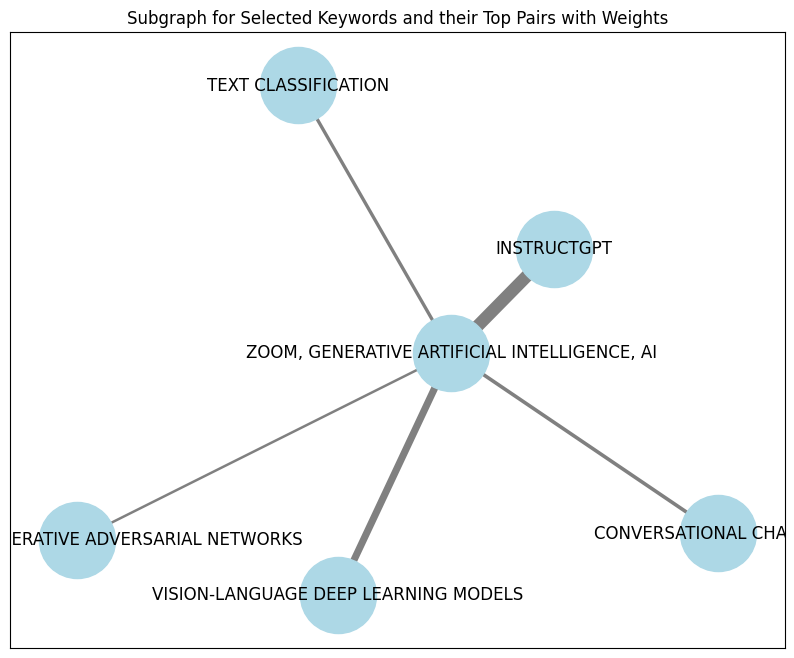

In [40]:
import networkx as nx

# Initialize a new graph
G_sub = nx.Graph()

# Add nodes and edges with weights from the modified top_pairs
for keyword, pairs in top_pairs_with_weights.items():
    for pair in pairs:
        G_sub.add_node(pair[0])
        G_sub.add_node(pair[1])
        G_sub.add_edge(pair[0], pair[1], weight=pair[2])  # Here, pair[2] is the weight

# Draw the subgraph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_sub, k=0.15, iterations=20)
nx.draw_networkx(G_sub, pos, node_color='lightblue', with_labels=True, node_size=3000, edge_color='gray', width=[G_sub[u][v]['weight']/10 for u,v in G_sub.edges()])
plt.title('Subgraph for Selected Keywords and their Top Pairs with Weights')
plt.show()

Summary - For our project on Landscape of Generative AI, we aimed to pinpoint the primary areas of research of Generative AI. We started by selecting "ZOOM, GENERATIVE ARTIFICIAL INTELLIGENCE, AI" as a central keyword to represent all related Generative AI topics. Then, we identified which other keywords appear most frequently with this central keyword in various articles. The top five associated keywords we found are "INSTRUCTGPT," "VISION-LANGUAGE DEEP LEARNING MODELS," "CONVERSATIONAL CHATBOTS," "TEXT CLASSIFICATION," and "WASSERSTEIN GENERATIVE ADVERSARIAL NETWORKS." These keywords are the ones most commonly linked to our main keyword in the articles. Our findings suggest that "INSTRUCTGPT" is currently the most focused area of research within the field of Generative AI.                  